In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
import pickle

In [4]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri
from plot_functions import latexify, format_axes

In [5]:
latexify(columns=1, fig_height=3.)

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Our TF, normal
Our TF, transfer
STF, normal
STF, transfer
Here
hrer no


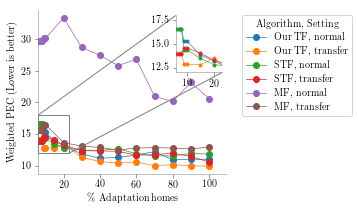

In [14]:
fig, ax = plt.subplots()

out = pickle.load(open('../predictions/lr-tf-SanDiego-Austin-all.pkl','r'))
out_mf = pickle.load(open('../predictions/mf-SanDiego-Austin.pkl','r'))



constant = 'True'
static = 'False'

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(plt.gca(), 1.5, loc=1)


for case in [2, 4]:
    
    for transfer in ['normal', 'transfer']:
        if case==2:
            algo = "{}, {}".format("Our TF", transfer)
        else:
            algo = "{}, {}".format("STF", transfer)
        print algo
        error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
        error.plot(label=algo, marker='o', ax=ax, linewidth=0.7)
        error.plot(label=algo, marker='.',ax=axins, legend=False, linewidth=0.6)
        
    

for transfer in ['normal', 'transfer']:
       
        algo = "{}, {}".format("MF", transfer)
        error = (pd.DataFrame(out_mf[transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
        error.plot(label=algo, marker='o', ax=ax, linewidth=0.7)

print "Here"
    
ax.legend(bbox_to_anchor=(1.05, 1), title='Algorithm, Setting')
ax.set_xlim((6, 110))
#plt.ylim((11, 18))
format_axes(plt.gca())
ax.set_xlabel(r"\% Adaptation homes")
ax.set_ylabel("Weighted PEC (Lower is better)")

print "hrer no"
x1, x2 = 6, 23
y1, y2= 12, 18
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
format_axes(ax)
plt.savefig('../figures/main-austin.pdf', bbox_inches="tight")